In [1]:
from pandas import DataFrame
from sklearn import linear_model


Stock_Market = {'Year': [2017,2017,2017,2017,2017,2017,2017,2017,2017,2017,2017,2017,2016,2016,2016,2016,2016,2016,2016,2016,2016,2016,2016,2016],
                'Month': [12, 11,10,9,8,7,6,5,4,3,2,1,12,11,10,9,8,7,6,5,4,3,2,1],
                'InterestRate': [2.75,2.5,2.5,2.5,2.5,2.5,2.5,2.25,2.25,2.25,2,2,2,1.75,1.75,1.75,1.75,1.75,1.75,1.75,1.75,1.75,1.75,1.75],
                'UnemploymentRate': [5.3,5.3,5.3,5.3,5.4,5.6,5.5,5.5,5.5,5.6,5.7,5.9,6,5.9,5.8,6.1,6.2,6.1,6.1,6.1,5.9,6.2,6.2,6.1],
                'StockIndexPrice': [1464,1394,1357,1293,1256,1254,1234,1195,1159,1167,1130,1075,1047,965,943,958,971,949,884,866,876,822,704,719]        
                }

df = DataFrame(Stock_Market,columns=['Year','Month','InterestRate','UnemploymentRate','StockIndexPrice'])

print (df)

    Year  Month  InterestRate  UnemploymentRate  StockIndexPrice
0   2017     12          2.75               5.3             1464
1   2017     11          2.50               5.3             1394
2   2017     10          2.50               5.3             1357
3   2017      9          2.50               5.3             1293
4   2017      8          2.50               5.4             1256
5   2017      7          2.50               5.6             1254
6   2017      6          2.50               5.5             1234
7   2017      5          2.25               5.5             1195
8   2017      4          2.25               5.5             1159
9   2017      3          2.25               5.6             1167
10  2017      2          2.00               5.7             1130
11  2017      1          2.00               5.9             1075
12  2016     12          2.00               6.0             1047
13  2016     11          1.75               5.9              965
14  2016     10          

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 5 columns):
Year                24 non-null int64
Month               24 non-null int64
InterestRate        24 non-null float64
UnemploymentRate    24 non-null float64
StockIndexPrice     24 non-null int64
dtypes: float64(2), int64(3)
memory usage: 1.0 KB


In [4]:
df.describe()

,Year,Month,InterestRate,UnemploymentRate,StockIndexPrice
count,24.000000,24.000000,24.000000,24.00000,24.000000
mean,2016.500000,6.500000,2.072917,5.77500,1070.083333
std,0.510754,3.526299,0.349527,0.33002,210.735341
min,2016.000000,1.000000,1.750000,5.30000,704.000000
25%,2016.000000,3.750000,1.750000,5.50000,928.250000
50%,2016.500000,6.500000,2.000000,5.85000,1061.000000
75%,2017.000000,9.250000,2.500000,6.10000,1239.000000
max,2017.000000,12.000000,2.750000,6.20000,1464.000000


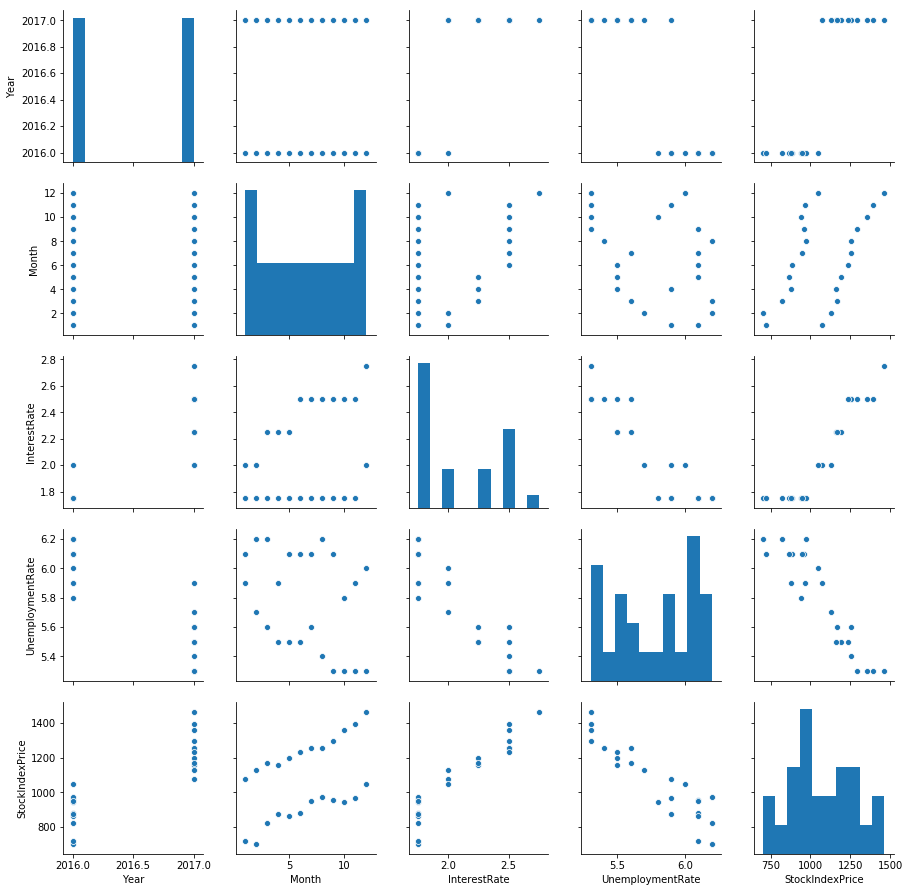

In [5]:
sns.pairplot(df)

C:\Users\Bruger\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


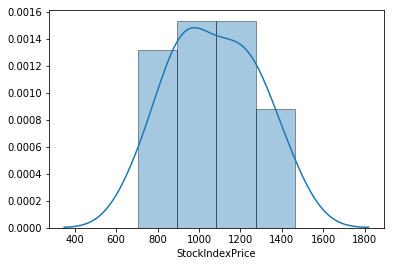

In [6]:
sns.distplot(df['StockIndexPrice'], hist_kws=dict(edgecolor="black"))

In [7]:
df.corr()

,Year,Month,InterestRate,UnemploymentRate,StockIndexPrice
Year,1.000000,0.000000,0.882851,-0.877000,0.863232
Month,0.000000,1.000000,0.339526,-0.351189,0.481287
InterestRate,0.882851,0.339526,1.000000,-0.925814,0.935793
UnemploymentRate,-0.877000,-0.351189,-0.925814,1.000000,-0.922338
StockIndexPrice,0.863232,0.481287,0.935793,-0.922338,1.000000


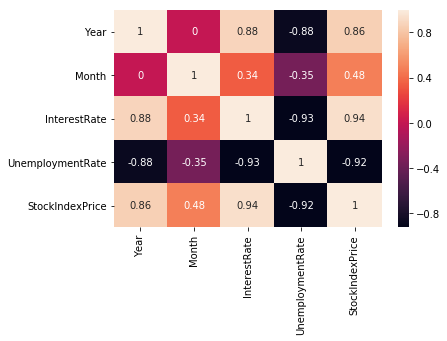

In [8]:
sns.heatmap(df.corr(), annot=True)

In [9]:
X = df[['InterestRate', 'UnemploymentRate']]
X2 = df[['InterestRate']]

In [10]:
y = df['StockIndexPrice']

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.1)
X2_train, X2_test, y2_train, y2_test = train_test_split(X2,y, test_size = 0.1)

In [12]:
#importing the Linear Regression Algorithm
from sklearn.linear_model import LinearRegression
#creating LinearRegression Object
lm = LinearRegression()
lm2 = LinearRegression()
#Training the Data Model
lm.fit(X_train, y_train)
lm2.fit(X2_train, y2_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [13]:
import pandas as pd
coeff_df = pd.DataFrame(lm.coef_, X.columns, columns=['Coefficient'])
coeff_df

,Coefficient
InterestRate,373.289042
UnemploymentRate,-218.018065


In [14]:
coeff_df = pd.DataFrame(lm2.coef_, X2.columns, columns=['Coefficient'])
coeff_df

,Coefficient
InterestRate,568.198582


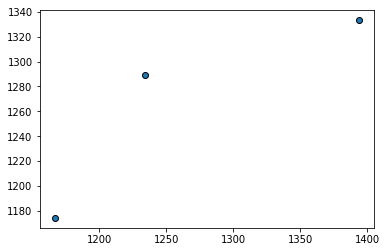

In [15]:
predictions = lm.predict(X_test)
plt.scatter(y_test, predictions, edgecolor='black')

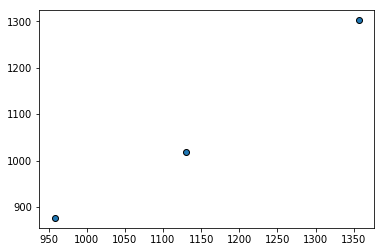

In [16]:
predictions2 = lm2.predict(X2_test)
plt.scatter(y2_test, predictions2, edgecolor='black')

C:\Users\Bruger\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


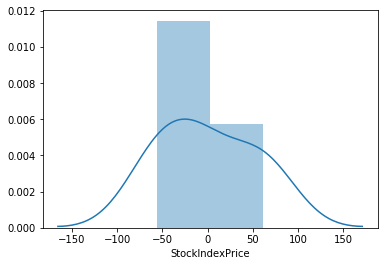

In [17]:
sns.distplot((y_test - predictions))

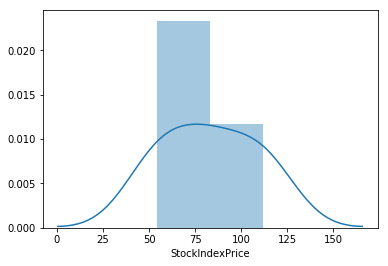

In [18]:
sns.distplot((y2_test - predictions2))

In [19]:
from sklearn import metrics
import numpy as np
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 41.275082114063785
MSE: 2281.0807600422318
RMSE: 47.76066121864554


In [20]:
print('MAE:', metrics.mean_absolute_error(y2_test, predictions2))
print('MSE:', metrics.mean_squared_error(y2_test, predictions2))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y2_test, predictions2)))

MAE: 82.6643026004728
MSE: 7377.211089314755
RMSE: 85.89069268154003
